In [1]:
%matplotlib inline
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy.io import wavfile
import scipy.signal as signal
import IPython.display as IPD
import seaborn as sns
import librosa
import librosa.display
import make_pseudo_label
import config
import noise
matplotlib.rcParams['figure.figsize'] = (16, 10)

/home/iwai/.pyenv/versions/3.6.2/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [77]:
cv_res = []
for i  in range(5):
    res = pd.read_csv("model/VGG1Dv2/2018_01_09_02_15_56/valid_probs.csv".format(i))
    cv_res.append(res)

FileNotFoundError: File b'cv/VGG1Dv2/2018_01_09_11_39_08_VGG1Dv3_2017/fold_0_test.csv' does not exist

In [ ]:
plt.scatter(cv_res[0][cv_res[0].possible_label == "up"].up, cv_res[0][cv_res[0].possible_label == "up"].off)

In [3]:
miss = cv_res[0][cv_res[0].plnum != np.argmax(cv_res[0].iloc[:, -12:].values, axis=1)]

In [4]:
miss.index = range(len(miss))
predict = pd.Series(miss.iloc[:, -12:].idxmax(axis=1), name="predict")
predict_max_probs = pd.Series(np.max(miss.iloc[:, -12:], axis=1), name="max_prob")
miss = pd.concat([miss, predict, predict_max_probs], axis=1, )
prob_sorted = miss.sort_values(by="max_prob")

In [5]:
pd.crosstab(miss.possible_label, miss.predict)

predict         down  go  left  no  off  on  right  silence  stop  unknown  \
possible_label                                                               
down               0  12     0  12    1   2      0        2     1       16   
go                18   0     1  22    3   3      0        3     2       10   
left               1   0     0   1    0   1      3        4     3        2   
no                 3  39     5   0    2   0      0        3     0       14   
off                1   4     0   2    0  17      2        2     0        6   
on                 2   0     2   0   29   0      0        7     0       13   
right              1   1    10   2    0   0      0        1     2       20   
silence            0   0     0   0    0   1      1        0     0        1   
stop               0  13     0   0    3   0      1        2     0        7   
unknown           13  20     2   9    7  20      8        4     6        0   
up                 0   3    10   0   29   3      0        3     5       12   
yes                1   3     4   8    1   4      0       32     0        7   

predict         up  yes  
possible_label           
down             1    1  
go               0    1  
left            13   22  
no               2    1  
off             36    0  
on               3    3  
right            4    1  
silence          0    0  
stop             9    0  
unknown          3    1  
up               0    0  
yes              1    0

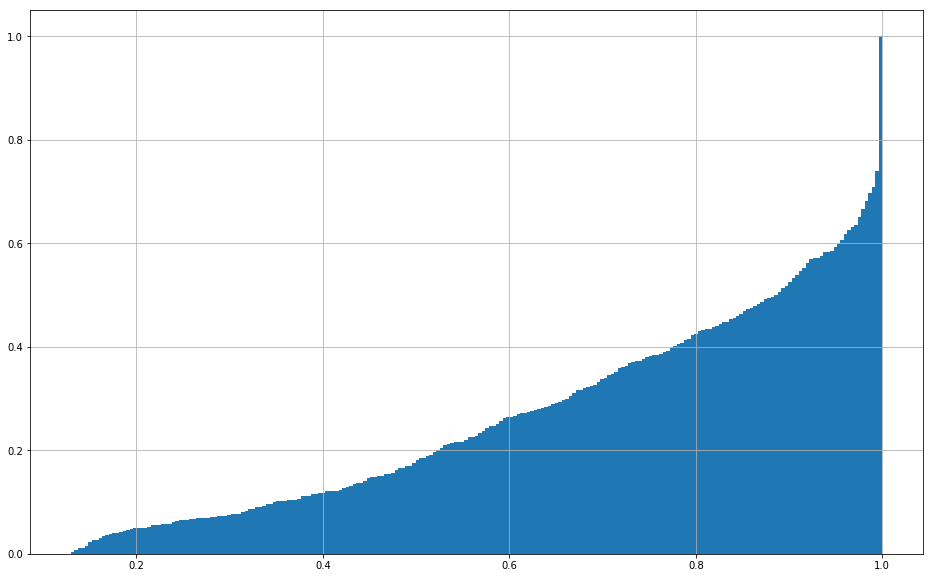

In [6]:
prob_sorted.max_prob.hist(cumulative=True, normed=1, bins=233)

In [7]:
prob_sorted[prob_sorted.predict == "unknown"].head(100)

is_valid                                               path  plnum  \
517    False  data/augment/2017_12_28_20_04_03/mix_random/up...      2   
655    False  data/augment/2017_12_28_20_04_03/pitch_up/sile...     10   
558    False  data/augment/2017_12_28_20_04_03/mix_random/do...      3   
205    False  data/augment/2017_12_28_20_04_03/speed_up/down...      3   
275    False  data/augment/2017_12_28_20_04_03/speed_up/righ...      5   
35       NaN       input/train/audio/down/df1d5024_nohash_2.wav      3   
528    False  data/augment/2017_12_28_20_04_03/mix_random/up...      2   
120    False  data/augment/2017_12_28_20_04_03/speed_up/yes/...      0   
310    False  data/augment/2017_12_28_20_04_03/pitch_up/yes/...      0   
485    False  data/augment/2017_12_28_20_04_03/mix_random/st...      8   
204    False  data/augment/2017_12_28_20_04_03/speed_up/down...      3   
25       NaN         input/train/audio/up/46a153d8_nohash_0.wav      2   
354    False  data/augment/2017_12_28_20_04_03/pitch_up/up/4...      2   
534    False  data/augment/2017_12_28_20_04_03/mix_random/up...      2   
625    False  data/augment/2017_12_28_20_04_03/mix_random/ri...      5   
157    False  data/augment/2017_12_28_20_04_03/speed_up/no/c...      1   
451    False  data/augment/2017_12_28_20_04_03/mix_random/ye...      0   
629    False  data/augment/2017_12_28_20_04_03/mix_random/ri...      5   
238    False  data/augment/2017_12_28_20_04_03/speed_up/on/4...      6   
4        NaN        input/train/audio/yes/190821dc_nohash_0.wav      0   
597    False  data/augment/2017_12_28_20_04_03/mix_random/on...      6   
615    False  data/augment/2017_12_28_20_04_03/mix_random/go...      9   
436    False  data/augment/2017_12_28_20_04_03/pitch_up/righ...      5   
80       NaN       input/train/audio/stop/ead2934a_nohash_1.wav      8   
390    False  data/augment/2017_12_28_20_04_03/pitch_up/off/...      7   
277    False  data/augment/2017_12_28_20_04_03/speed_up/righ...      5   
223    False  data/augment/2017_12_28_20_04_03/speed_up/off/...      7   
183    False  data/augment/2017_12_28_20_04_03/speed_up/up/4...      2   
37       NaN       input/train/audio/down/46a153d8_nohash_4.wav      3   
166     True  data/augment/2017_12_28_20_04_03/speed_up/no/b...      1   
..       ...                                                ...    ...   
624    False  data/augment/2017_12_28_20_04_03/mix_random/ri...      5   
175    False  data/augment/2017_12_28_20_04_03/speed_up/up/1...      2   
240    False  data/augment/2017_12_28_20_04_03/speed_up/on/3...      6   
503     True  data/augment/2017_12_28_20_04_03/mix_random/no...      1   
496    False  data/augment/2017_12_28_20_04_03/mix_random/no...      1   
406    False  data/augment/2017_12_28_20_04_03/pitch_up/on/1...      6   
462     True  data/augment/2017_12_28_20_04_03/mix_random/ye...      0   
640    False  data/augment/2017_12_28_20_04_03/mix_random/le...      4   
52       NaN      input/train/audio/right/c0c701f1_nohash_0.wav      5   
599    False  data/augment/2017_12_28_20_04_03/mix_random/on...      6   
28       NaN         input/train/audio/up/15c563d7_nohash_2.wav      2   
603    False  data/augment/2017_12_28_20_04_03/mix_random/on...      6   
438    False  data/augment/2017_12_28_20_04_03/pitch_up/righ...      5   
19       NaN         input/train/audio/no/bdee441c_nohash_0.wav      1   
425    False  data/augment/2017_12_28_20_04_03/pitch_up/go/2...      9   
242    False  data/augment/2017_12_28_20_04_03/speed_up/on/1...      6   
637    False  data/augment/2017_12_28_20_04_03/mix_random/ri...      5   
38       NaN       input/train/audio/down/18a8f03f_nohash_0.wav      3   
280    False  data/augment/2017_12_28_20_04_03/speed_up/righ...      5   
49       NaN      input/train/audio/right/3df9a3d4_nohash_0.wav      5   
257     True  data/augment/2017_12_28_20_04_03/speed_up/go/b...      9   
338     True  data/augment/2017_12_28_20_04_03/pitch_up/no/b...      1   
200    F

In [118]:
def show_sample(row):
    sr, wav = wavfile.read(row.path)
    print("fname: {}\tlabel: {}\tpredict: {}\tprobs: {}".format(row.path, row.possible_label, row.predict, row.max_prob))
    IPD.display(IPD.Audio(wav, rate=sr))

print(len(prob_sorted[prob_sorted.possible_label == "unknown"].head(20).apply(show_sample, axis=1)))

fname: data/augment/2017_12_25_00_55_41/mix_random/nine/5e1b34a6_nohash_0.wav	label: unknown	predict: silence	probs: 0.1164647862315178


fname: data/augment/2017_12_25_00_55_41/mix_random/house/b8897f1c_nohash_0.wav	label: unknown	predict: on	probs: 0.1164909079670906


fname: data/augment/2017_12_25_00_55_41/mix_random/nine/b8897f1c_nohash_0.wav	label: unknown	predict: up	probs: 0.1200433224439621


fname: data/augment/2017_12_25_00_55_41/mix_random/six/fe291fa9_nohash_1.wav	label: unknown	predict: on	probs: 0.1262417882680893


fname: data/augment/2017_12_25_00_55_41/mix_random/marvin/c25a032b_nohash_1.wav	label: unknown	predict: go	probs: 0.12761364877223969


fname: data/augment/2017_12_25_00_55_41/mix_random/three/33f60c62_nohash_2.wav	label: unknown	predict: yes	probs: 0.12938116490840912


fname: data/augment/2017_12_25_00_55_41/mix_random/eight/1657c9fa_nohash_0.wav	label: unknown	predict: yes	probs: 0.13022249937057495


fname: data/augment/2017_12_25_00_55_41/mix_random/four/5efb758c_nohash_1.wav	label: unknown	predict: down	probs: 0.13122913241386416


fname: data/augment/2017_12_25_00_55_41/add_wn/wow/4fe01997_nohash_0.wav	label: unknown	predict: no	probs: 0.13147446513175964


fname: data/augment/2017_12_25_00_55_41/mix_random/seven/9cde5de8_nohash_0.wav	label: unknown	predict: silence	probs: 0.13173359632492065


fname: data/augment/2017_12_25_00_55_41/mix_random/bed/c84f9b5c_nohash_0.wav	label: unknown	predict: yes	probs: 0.1326466053724289


fname: data/augment/2017_12_25_00_55_41/speed_up/one/4fe01997_nohash_0.wav	label: unknown	predict: left	probs: 0.13509368896484375


fname: data/augment/2017_12_25_00_55_41/mix_random/happy/91cdef62_nohash_0.wav	label: unknown	predict: no	probs: 0.13544832170009613


fname: data/augment/2017_12_25_00_55_41/mix_random/six/1993db46_nohash_2.wav	label: unknown	predict: silence	probs: 0.13655033707618713


fname: data/augment/2017_12_25_00_55_41/mix_random/four/4254621e_nohash_0.wav	label: unknown	predict: up	probs: 0.1371830403804779


fname: data/augment/2017_12_25_00_55_41/mix_random/zero/4beff0c5_nohash_0.wav	label: unknown	predict: silence	probs: 0.13720086216926575


fname: data/augment/2017_12_25_00_55_41/mix_random/house/257251e0_nohash_0.wav	label: unknown	predict: off	probs: 0.13755738735198975


fname: data/augment/2017_12_25_00_55_41/mix_random/eight/a996cf66_nohash_0.wav	label: unknown	predict: silence	probs: 0.13783539831638336


fname: data/augment/2017_12_25_00_55_41/mix_random/three/91bed2e0_nohash_0.wav	label: unknown	predict: stop	probs: 0.13873890042304993


fname: data/augment/2017_12_25_00_55_41/mix_random/six/5e1b34a6_nohash_0.wav	label: unknown	predict: left	probs: 0.1388116180896759


20


In [237]:
sr, wav = wavfile.read('data/augment/2017_12_28_20_04_03/speed_up/four/28ce0c58_nohash_4.wav'.format(i))
IPD.display(IPD.Audio(wav, rate=sr))

In [177]:
np.abs(wav).max()*0.1

997.70000000000005

In [239]:
sr, wav = wavfile.read('input/train/audio/three/1a9afd33_nohash_0.wav')
IPD.display(IPD.Audio(wav, rate=sr))

In [48]:
stft_submit = pd.read_csv("submit/2018_01_02_13_39_20.csv")
vgg1d_submit = pd.read_csv("submit/2018_01_01_20_16_18.csv")

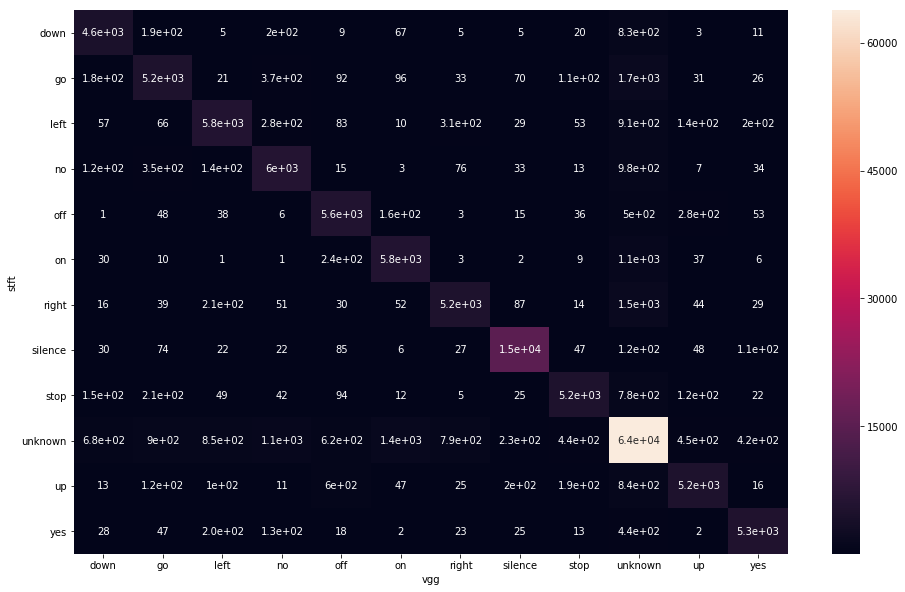

In [63]:
stft = stft_submit.rename(columns={"label": "stft"})
vgg = vgg1d_submit.rename(columns={"label": "vgg"})
sns.heatmap(pd.crosstab(stft.stft, vgg.vgg), annot=True)

In [80]:
for fname, l in vgg1d_submit[vgg1d_submit.label != stft_submit.label].sample(5).values:
    print(fname, l)
    sr, wav = wavfile.read('input/test/audio/{}'.format(fname))
    IPD.display(IPD.Audio(wav, rate=sr))

clip_a3ce5efc9.wav off


clip_4e520ad8d.wav unknown


clip_509bd6a87.wav no


clip_ee04cea92.wav off


clip_02ce383fd.wav unknown


In [82]:
sr, wav = wavfile.read('input/test/audio/clip_3747da4c8.wav')
IPD.display(IPD.Audio(wav, rate=sr))

In [15]:
cv_stft = []
for i in range(5):
    X = make_pseudo_label.make_pseudo_labeling("STFTCNN/2018_01_07_05_16_53/", i, max_probs_drop=False)
    cv_stft.append(X)

fold 0
fold 1
fold 2
fold 3
fold 4
(4, 158538, 12)
unknown    75437
silence    14393
on          8018
off         7485
go          7383
no          7149
left        6916
right       6725
stop        6586
up          6428
yes         6089
down        5929
Name: possible_label, dtype: int64
fold 0
fold 1
fold 2
fold 3
fold 4
(4, 158538, 12)
unknown    75146
silence    14088
on          7972
go          7593
off         7430
no          7148
left        7106
right       7011
stop        6632
up          6391
yes         6102
down        5919
Name: possible_label, dtype: int64
fold 0
fold 1
fold 2
fold 3
fold 4
(4, 158538, 12)
unknown    76060
silence    14415
on          7853
off         7331
go          7280
right       7030
no          6962
left        6958
up          6449
stop        6281
yes         6137
down        5782
Name: possible_label, dtype: int64
fold 0
fold 1
fold 2
fold 3
fold 4
(4, 158538, 12)
unknown    76020
silence    12547
go          7950
on          7767
off        

vgg1dv2 fold 0


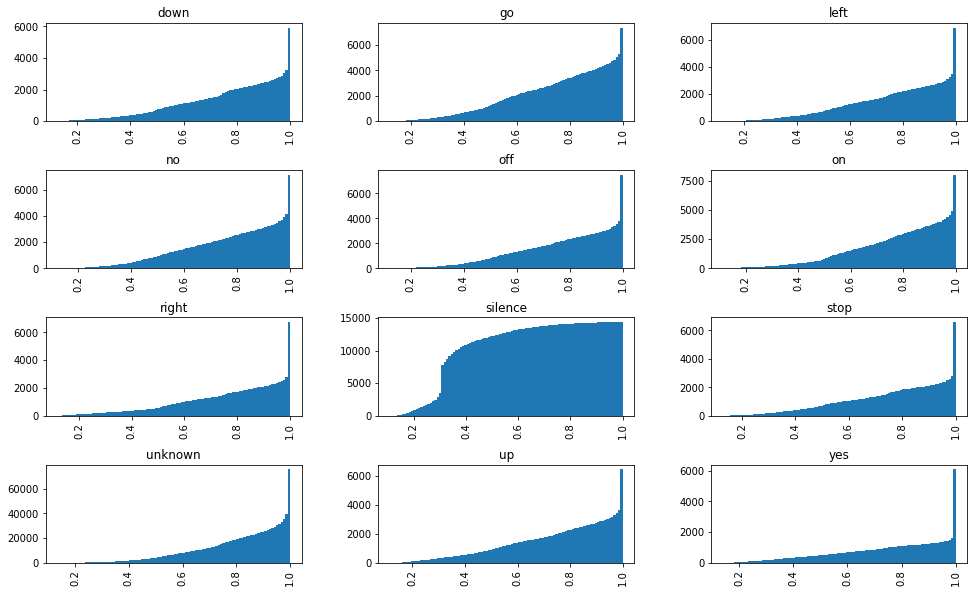

vgg1dv2 fold 1


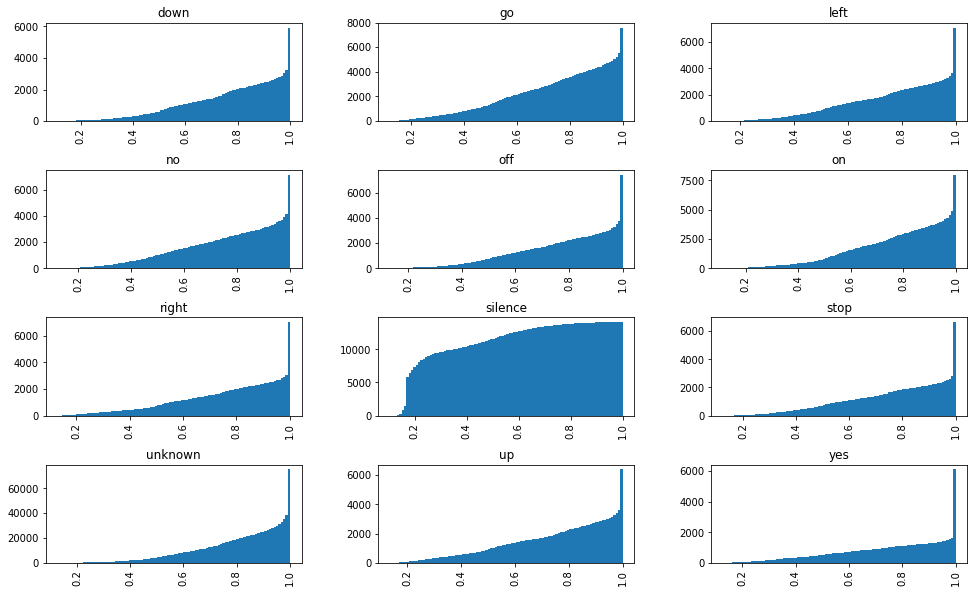

vgg1dv2 fold 2


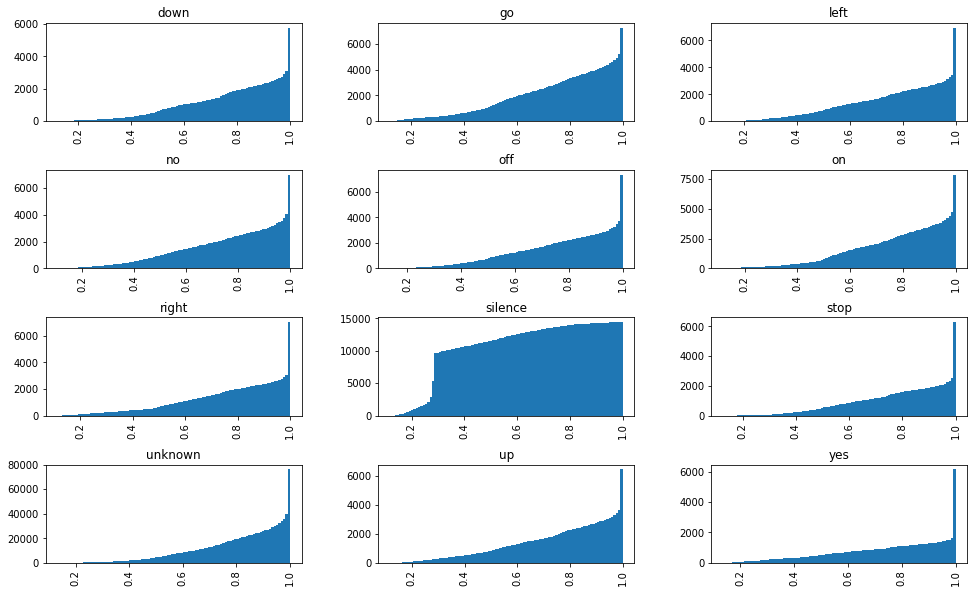

vgg1dv2 fold 3


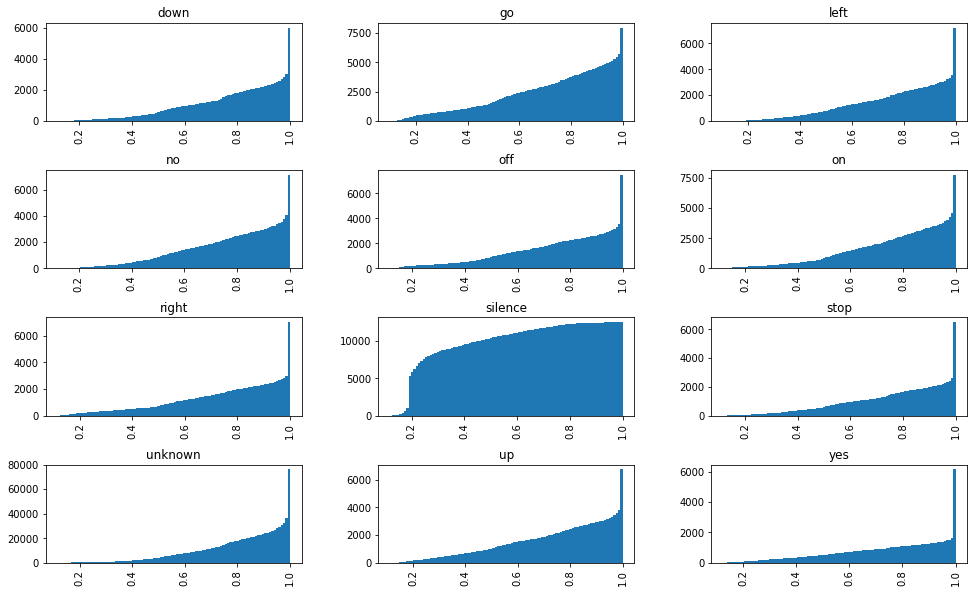

vgg1dv2 fold 4


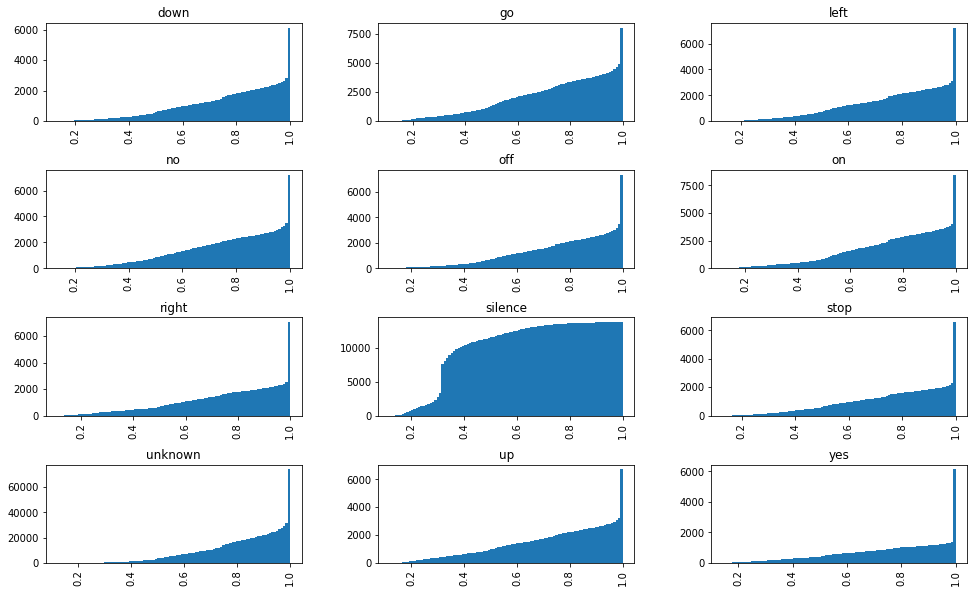

In [17]:
for i, X in enumerate(cv_stft):
    print("stftcnn fold", i)
    X["max_probs"].hist(by=X["possible_label"], cumulative=True, bins=100)
    plt.show()

In [20]:
cv_vgg1d = []
for i in range(5):
    X2 = make_pseudo_label.make_pseudo_labeling("VGG1Dv2/2018_01_09_11_39_08_VGG1Dv3_2017_2018_01_09_15_25_34", 0, max_probs_drop=False)
    cv_vgg1d.append(X2)

fold 0
fold 1
fold 2
fold 3
fold 4
(4, 158538, 12)
unknown    75160
silence    16226
no          7916
on          7599
left        7298
go          6955
up          6888
off         6627
right       6393
stop        5990
yes         5818
down        5668
Name: possible_label, dtype: int64
fold 0
fold 1
fold 2
fold 3
fold 4
(4, 158538, 12)
unknown    75160
silence    16226
no          7916
on          7599
left        7298
go          6955
up          6888
off         6627
right       6393
stop        5990
yes         5818
down        5668
Name: possible_label, dtype: int64
fold 0
fold 1
fold 2
fold 3
fold 4
(4, 158538, 12)
unknown    75160
silence    16226
no          7916
on          7599
left        7298
go          6955
up          6888
off         6627
right       6393
stop        5990
yes         5818
down        5668
Name: possible_label, dtype: int64
fold 0
fold 1
fold 2
fold 3
fold 4
(4, 158538, 12)
unknown    75160
silence    16226
no          7916
on          7599
left       

vgg1dv2 fold 0


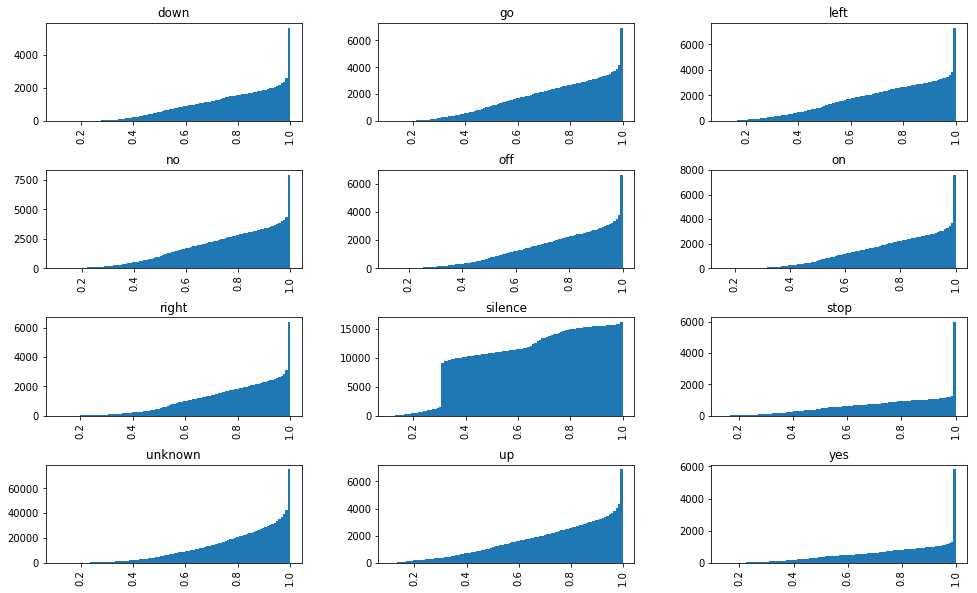

vgg1dv2 fold 1


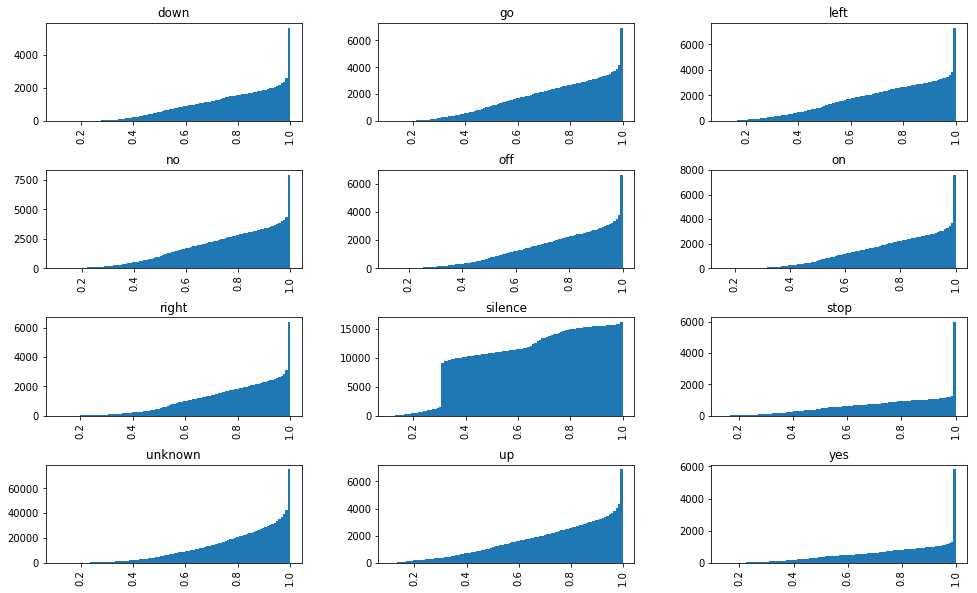

vgg1dv2 fold 2


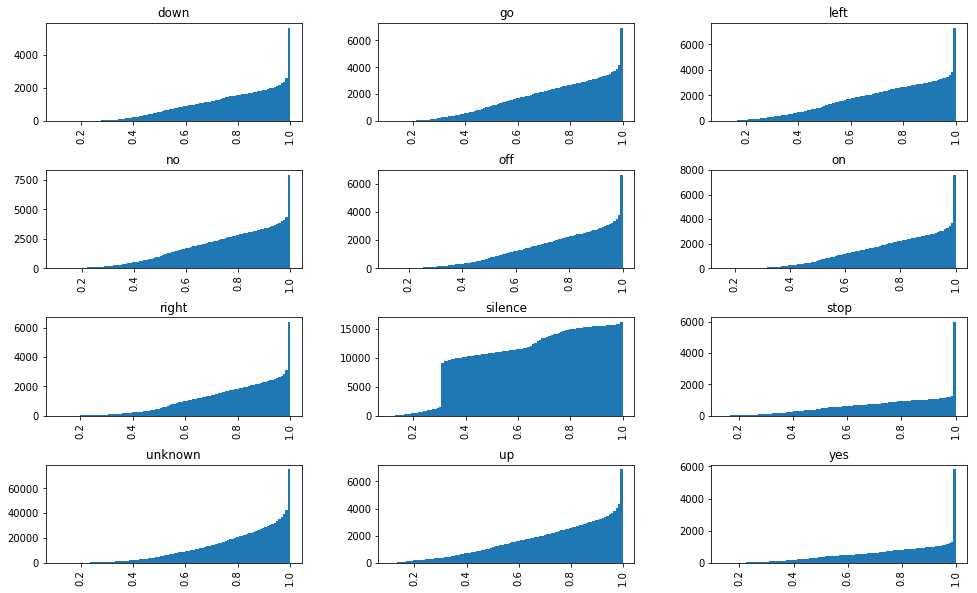

vgg1dv2 fold 3


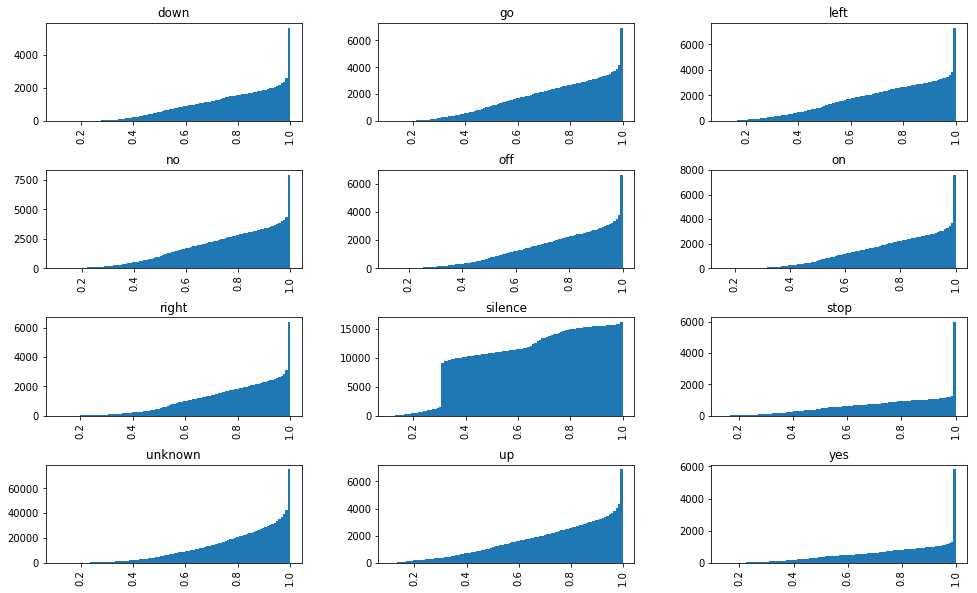

vgg1dv2 fold 4


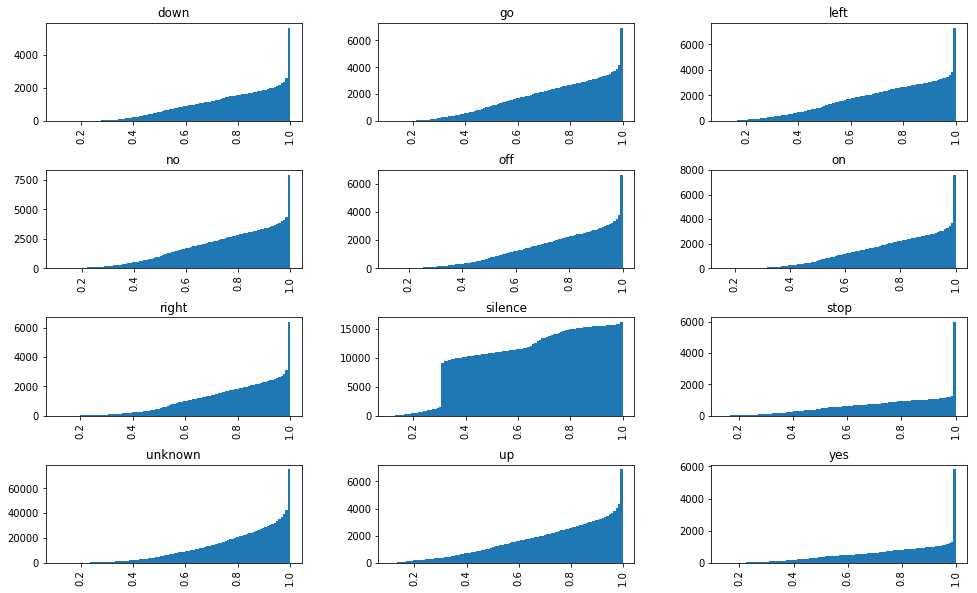

In [21]:
for i, X in enumerate(cv_vgg1d):
    print("vgg1dv2 fold", i)
    X["max_probs"].hist(by=X["possible_label"], cumulative=True, bins=100)
    plt.show()

In [26]:
vgg_sub = pd.read_csv("submit/2018_01_10_15_08_41.csv")
vgg_sub = vgg_sub.sort_values(by="fname")
vgg_sub = vgg_sub.rename(columns={"label": "vgg"})
stft_sub = pd.read_csv("submit/2018_01_10_15_54_56.csv")
stft_sub = stft_sub.sort_values(by="fname")
stft_sub = stft_sub.rename(columns={"label": "stft"})
assert(all(vgg_sub.fname.values == stft_sub.fname.values))

In [27]:
pd.crosstab(vgg_sub.vgg, stft_sub.stft)

stft     down    go  left    no   off    on  right  silence  stop  unknown  \
vgg                                                                          
down     5562    13     3    38     1    20      0        9     2      106   
go         22  6838     0    51    14     7      4       22    12      238   
left        2     1  6842     9     2     1     11        8     4      114   
no         24    49    21  7029     0     3      2       12     2       77   
off         0    13     5     0  6877    24      0        8     5       83   
on          4     1     3     1    18  7279      7        6     0      239   
right       0     0    22     1     3     4   6241        6     0      107   
silence     0     2     3     0     0     0      1    15419     0       20   
stop        7    24     1     3    13     0      1       12  5972      136   
unknown    38   104   100    78    18    92    105       24    22    75814   
up          0     8    12     0    35     9      3       14    13       66   
yes         0     4    14    10     0     0      1       14     1       33   

stft       up   yes  
vgg                  
down        0     1  
go          6     0  
left       14    10  
no          0     8  
off        57     1  
on         12     0  
right       5     1  
silence     0     2  
stop       14     1  
unknown    49    12  
up       6237     0  
yes         0  5730

In [57]:
for fname in X.sample(5).values:
    print(fname[0], fname[2])
    sr, wav = wavfile.read(fname[0])
    IPD.display(IPD.Audio(wav, rate=sr))
    IPD.display(IPD.Audio(-1*wav, rate=sr))

input/test/audio/clip_c96fef9c9.wav unknown


input/test/audio/clip_4cd39863f.wav yes


input/test/audio/clip_e10821879.wav unknown


input/test/audio/clip_887cfffd0.wav unknown


input/test/audio/clip_812a5ba91.wav up


In [50]:
X.columns

Index(['path', 'plnum', 'possible_label'], dtype='object')

In [3]:
make_pserudo_label.make_pseudo_augment(X, config.AUG_LIST, "2018_01_02_22_20_44_test_augment")

path  plnum  \
2                     input/test/audio/clip_df571e207.wav      0   
3                     input/test/audio/clip_f3a6a5c5f.wav     11   
4                     input/test/audio/clip_c5b65522e.wav     10   
5                     input/test/audio/clip_469eaef8e.wav     11   
9                     input/test/audio/clip_4981a2c9d.wav     11   
14                    input/test/audio/clip_31ee29b76.wav      1   
16                    input/test/audio/clip_8ace15dd4.wav      7   
17                    input/test/audio/clip_814af1229.wav     11   
19                    input/test/audio/clip_8853ae0e2.wav      0   
21                    input/test/audio/clip_380bde467.wav      7   
24                    input/test/audio/clip_3edb98dee.wav     11   
26                    input/test/audio/clip_e5bdd5370.wav     11   
27                    input/test/audio/clip_73e8bb94e.wav      9   
28                    input/test/audio/clip_115b40c44.wav      1   
30                    input/test/audio/clip_c0fe96121.wav      1   
33                    input/test/audio/clip_4000a6851.wav     11   
38                    input/test/audio/clip_545a1ae73.wav      1   
41                    input/test/audio/clip_b319fbf76.wav      8   
42                    input/test/audio/clip_79f735920.wav      3   
43                    input/test/audio/clip_f5a9e7e41.wav      1   
44                    input/test/audio/clip_3726e72cb.wav     11   
45                    input/test/audio/clip_e58997880.wav     11   
46                    input/test/audio/clip_8f2e55e7e.wav      0   
49                    input/test/audio/clip_a4114a8e4.wav      0   
51                    input/test/audio/clip_344d56ec2.wav      8   
57                    input/test/audio/clip_3b9bebdb2.wav      7   
59                    input/test/audio/clip_3c9903b15.wav     11   
61                    input/test/audio/clip_9f2da4477.wav     11   
62                    input/test/audio/clip_c421a9af8.wav      5   
64                    input/test/audio/clip_1e5649b86.wav     11   
...                                                   ...    ...   
158466  data/augment/2018_01_02_22_20_44_test_augment/...      4   
158468  data/augment/2018_01_02_22_20_44_test_augment/...      1   
158469  data/augment/2018_01_02_22_20_44_test_augment/...      4   
158475  data/augment/2018_01_02_22_20_44_test_augment/...     11   
158482  data/augment/2018_01_02_22_20_44_test_augment/...      0   
158486  data/augment/2018_01_02_22_20_44_test_augment/...      2   
158488  data/augment/2018_01_02_22_20_44_test_augment/...      2   
158492  data/augment/2018_01_02_22_20_44_test_augment/...     11   
158499  data/augment/2018_01_02_22_20_44_test_augment/...      1   
158500  data/augment/2018_01_02_22_20_44_test_augment/...     11   
158501  data/augment/2018_01_02_22_20_44_test_augment/...      1   
158503  data/augment/2018_01_02_22_20_44_test_augment/...     11   
158504  data/augment/2018_01_02_22_20_44_test_augment/...     11   
158505  data/augment/2018_01_02_22_20_44_test_augment/...      8   
158507  data/augment/2018_01_02_22_20_44_test_augment/...      0   
158508  data/augment/2018_01_02_22_20_44_test_augment/...      8   
158509  data/augment/2018_01_02_22_20_44_test_augment/...      6   
158510  data/augment/2018_01_02_22_20_44_test_augment/...      7   
158511  data/augment/2018_01_02_22_20_44_test_augment/...     11   
158513  data/augment/2018_01_02_22_20_44_test_augment/...      6   
158514  data/augment/2018_01_02_22_20_44_test_augment/...      0   
158515  data/augment/2018_01_02_22_20_44_test_augment/...     10   
158516  data/augment/2018_01_02_22_20_44_test_augment/...      0   
158519  data/augment/2018_01_02_22_20_44_test_augment/...      9   
158520  data/augment/2018_01_02_22_20_44_test_augment/...     11   
158521  data/augment/2018_01_02_22_20_44_test_augment/...     11   
158524  data/augment/2018_01_02_22_20_44_test_augment/...     11   
158527  data/augment/2018_01_02_22_20_44_

In [5]:
%debug

> /home/iwai/Documents/workspace/kaggle/speech-recognition/env/lib/python3.6/site-packages/pandas/core/internals.py(4603)construction_error()
   4601         raise ValueError("Empty data passed with indices specified.")
   4602     raise ValueError("Shape of passed values is {0}, indices imply {1}".format(
-> 4603         passed, implied))
   4604 
   4605 

ipdb> pseudo_aug
*** NameError: name 'pseudo_aug' is not defined
ipdb> q


In [63]:
rn = []
for _ in range(60):
    rn.append(noise.gen_noise("brown", 1))
red_noise = np.concatenate(rn)
IPD.display(IPD.Audio(red_noise, rate=config.SAMPLE_RATE))

In [74]:
sr, wav = wavfile.read("data/augment/2018_01_08_15_33_14_param_fixed/pitch_up/marvin/0132a06d_nohash_0.wav")
IPD.display(IPD.Audio(wav, rate=sr))
sr, wav = wavfile.read("data/augment/2018_01_08_15_33_14_param_fixed/pitch_up/marvin/0132a06d_nohash_0.wav")
IPD.display(IPD.Audio(wav, rate=sr))

In [38]:
S = librosa.feature.melspectrogram(y=wav, sr=config.SAMPLE_RATE)

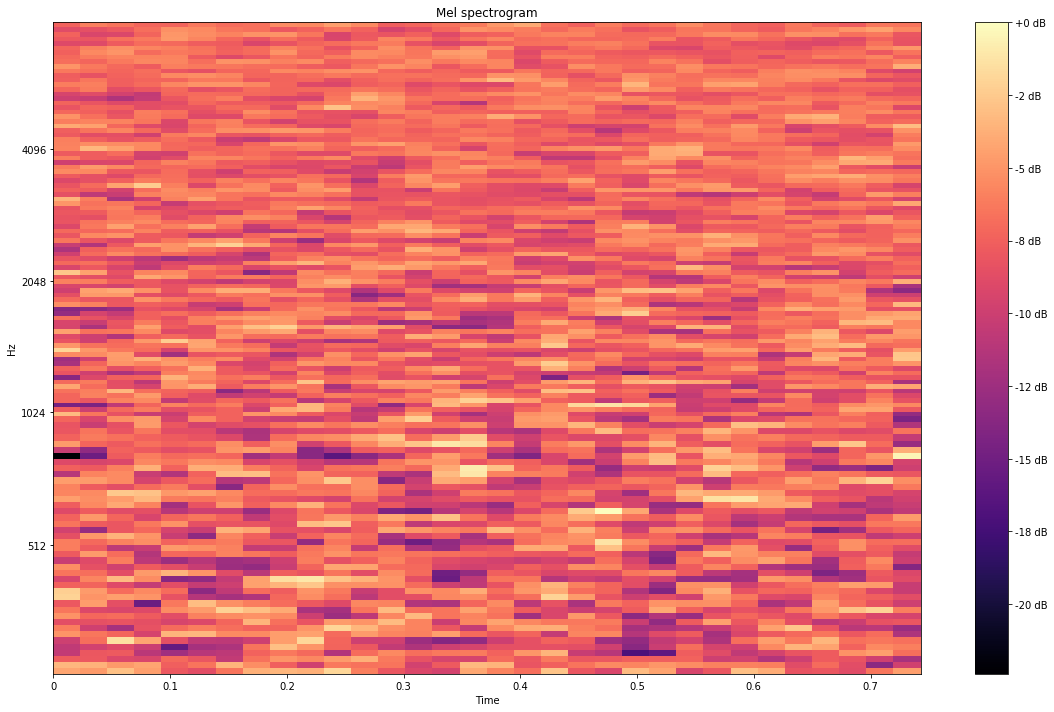

In [39]:
librosa.display.specshow(librosa.power_to_db(S, ref=np.max), y_axis='mel', fmax=8000, x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel spectrogram')
plt.tight_layout()

In [40]:
S.shape

(128, 32)

In [36]:
np.max()

TypeError: amax() missing 1 required positional argument: 'a'

In [61]:
[np.random.randint(10)]*3

[4, 4, 4]

In [67]:
S.shape

(128, 32)

In [76]:
librosa.feature.mfcc(y=wav, sr=config.SAMPLE_RATE).shape

(20, 32)

In [78]:
Res = pd.read_csv("model/VGG1Dv2/2018_01_09_02_15_56/valid_probs.csv")

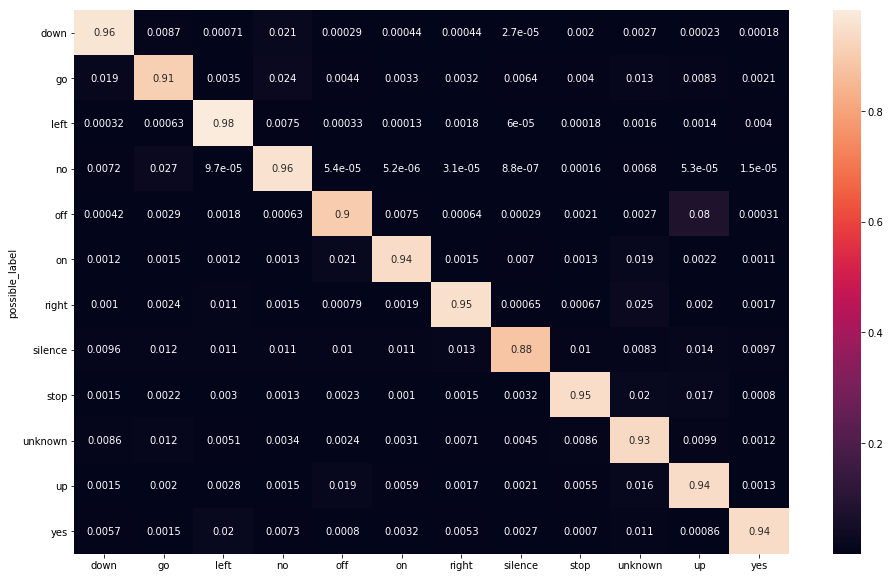

In [85]:
sns.heatmap(Res.groupby("possible_label")[sorted(config.POSSIBLE_LABELS)].mean(), annot=True)

In [108]:
Res["max_probs"] = Res[config.POSSIBLE_LABELS].max(1)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f991d72e8d0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f991dc1fd68>]], dtype=object)

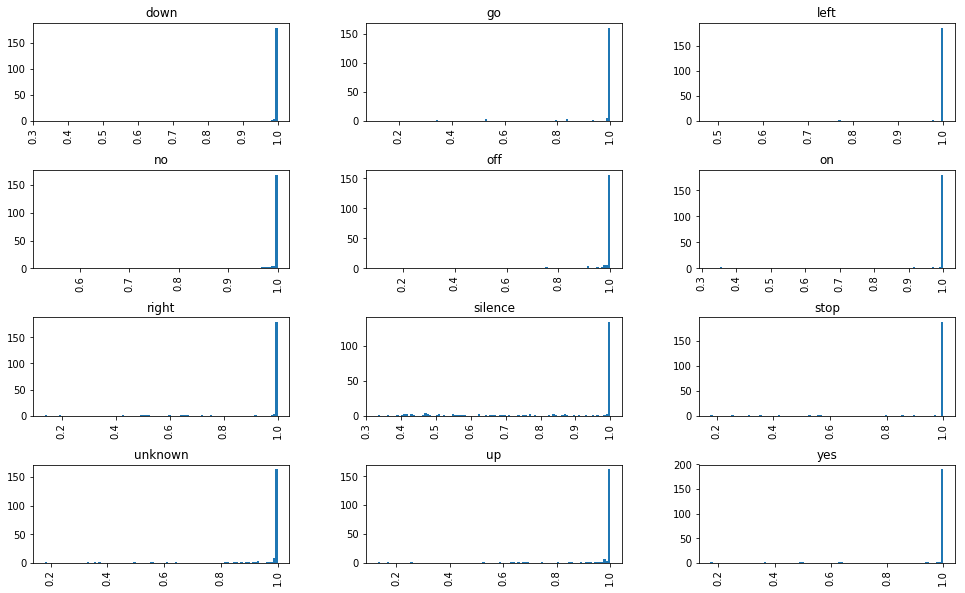

In [110]:
Res.max_probs.hist(by=Res.possible_label, bins=100)

In [100]:
def highpass_filter(samples, cutoff,                                                 
                   sample_rate=config.SAMPLE_RATE,                            
                   numtaps=255):                                                        
    nyq_freq = sample_rate/2                                                    
    cutoff_normalized = cutoff/nyq_freq                                  
    fir_filter = signal.firwin(numtaps, cutoff_normalized, pass_zero=False)        
    filterred_samples = signal.lfilter(fir_filter, 1, samples)       
    return filterred_samples

In [105]:
for row in Res[Res.possible_label == "off"][["path", "up"]].sort_values(by="up", ascending=False).head(10).values:
    print(row[0], row[1])
    sr, wav = wavfile.read(row[0])
    IPD.display(IPD.Audio(wav, rate=sr))
    IPD.display(IPD.Audio(highpass_filter(wav, 880), rate=sr))

input/train/audio/off/c6ee87a7_nohash_3.wav 0.9999340772628784


input/train/audio/off/c6ee87a7_nohash_0.wav 0.9998533725738524


input/train/audio/off/b6ebe225_nohash_0.wav 0.9994148015975952


input/train/audio/off/c50225fa_nohash_2.wav 0.9968854784965516


input/train/audio/off/dbb40d24_nohash_1.wav 0.9800208210945128


input/train/audio/off/5fadb538_nohash_0.wav 0.9722541570663452


input/train/audio/off/cc6bae0d_nohash_0.wav 0.9154860973358154


input/train/audio/off/f9ebdba0_nohash_0.wav 0.900160551071167


input/train/audio/off/c842b5e4_nohash_0.wav 0.8512165546417236


input/train/audio/off/41285056_nohash_1.wav 0.8133989572525024
